# Q1. 
What is the Big-O performance of this code?

i=n
k = 0
while i > 0:
    k=k+2
    i = i // 2 
print k

In [265]:
# Check the number of time a loop is executed
import numpy as np
j = np.zeros(800)

for n in range(800):i=n
k = 0
while i > 0:
k=k+2
i = i // 2 
print k
    i = n
    k = 0   ## need to intialize k to run the program
    while i > 0:
        k=k+2
        i = i // 2 
        j[n] += 2
    
j = j + 3   ## adding 3 for 'i = n', 'k = 0', 'print k' commands outside loop
print j

[  3.   5.   7.   7.   9.   9.   9.   9.  11.  11.  11.  11.  11.  11.  11.
  11.  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.  13.
  13.  13.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.
  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.
  15.  15.  15.  15.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.
  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.
  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.
  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.  17.
  17.  17.  17.  17.  17.  17.  17.  17.  19.  19.  19.  19.  19.  19.  19.
  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.
  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.
  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.
  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.  19.
  19.  19.  

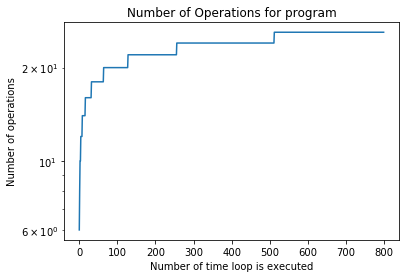

In [269]:
import matplotlib.pyplot as plt
plt.plot(j+3)  # plot z+3 against n
plt.yscale('log')
plt.title("Number of Operations for program")
plt.xlabel("Number of time loop is executed")
plt.ylabel("Number of operations")
plt.show()

The output of (z + 3) and its plot against n values show that the graph follows a logarithmic scale. The loop gets executed with the dominant function of log n to base 2. Hence the Big-O performance of this code is log n to base 2.

# Q2. 
Simulate a grocery check-out counter with three servers and determine the average waiting time that customers spend in line for a given set of parameters. Specifically the system may be characterized by three variables: x, p, T.
i. Each minute there is x% chance that a customer arrives.
ii. It takes one server p minutes to process one customer.
iii. System is initially empty and is run for T minutes.
All customers join one line in front of the servers. When a server becomes available,
customer at the front of the line goes to that server. You may use the Queue structure
discussed in class, to keep track of the queue of customers.

In [275]:
from random import randint
import numpy as np

class Grocery:
    
    
    def __init__(self, x, p, T):  
        
        self.entry_list = []       # list of all the customers entering at any time
        self.cust_queue = []       # list of all the customers currently in the queue
        self.server_que = [1,2,3]  # three counter choices at server
        self.start_time_list =[]   # start time for any customer
        self.end_time_list=[]      # end time for any customer   
        self.cashier_queue = [0]*3 # cashier queue for 3 counter
###  Time for every customer


        for i in T:
            
    
            if (i in self.end_time_list) & (len(self.server_que) < 3):  # if there is no element in server list and 
                self.server_que.append(len(self.server_que)+1)          # if the customer has left assign, put value in server list for missing value
    
            if randint(1,100) <= x:              # get any random data in the range 1 to 100, check if that value is greater  
                self.entry_list.append(i)       # than probability that a customer arrives (x).
                self.cust_queue.append(i)       # append that time to list of all customers and those currently in queue
    
            if (len(self.cust_queue)!=0) & (len(self.server_que)>0):   # if there is a customer in my current list and there is some place in my server list
                self.server_que.pop()                                  # remove the element from the server list to show it as busy. The element removed 
                self.start_time_list.append(i)                         # record start time 
                self.end_time_list.append(i+p)                         # record end time after adding processing time p
                del self.cust_queue[0]                                 # remove that customer from the current list of customer
                 
            self.waiting_time = [(i - j) for i, j in zip(self.end_time_list, self.entry_list)]  # find the element wise difference
            
    def ArrivedStoreAt(self):
        return self.entry_list
                                
    def joinedQueueAt(self):
        return self.start_time_list
    
    def leftQueueAt(self):
        return self.end_time_list
    
    def timeWaited(self):
        return (self.waiting_time)
    
    def waiting(self):
        return (sum(self.end_time_list) - sum(self.entry_list)) / float(len(self.entry_list)) # return average waiting time

In [276]:
# passing the parameter
instance= Grocery(50, 5, range(100))

In [277]:
# list of people who joined queue at a certain time
print instance.joinedQueueAt()

[0, 3, 4, 5, 8, 9, 11, 13, 14, 16, 18, 19, 21, 23, 24, 26, 28, 29, 31, 33, 34, 36, 38, 39, 41, 43, 44, 46, 48, 49, 60, 62, 63, 65, 67, 68, 70, 72, 73, 75, 77, 78, 80, 82, 83, 85, 87, 88, 90, 92, 93, 96, 99]


In [278]:
# list of people who left the queue at a certain time. Assuming those people who entered before closing the store where processed
print instance.leftQueueAt()

[5, 8, 9, 10, 13, 14, 16, 18, 19, 21, 23, 24, 26, 28, 29, 31, 33, 34, 36, 38, 39, 41, 43, 44, 46, 48, 49, 51, 53, 54, 65, 67, 68, 70, 72, 73, 75, 77, 78, 80, 82, 83, 85, 87, 88, 90, 92, 93, 95, 97, 98, 101, 104]


In [279]:
# time at which customers entered the store
print instance.ArrivedStoreAt() 

[0, 3, 4, 5, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 29, 30, 32, 33, 37, 39, 40, 42, 43, 44, 45, 47, 60, 62, 63, 64, 65, 66, 70, 71, 72, 73, 74, 75, 77, 78, 81, 83, 84, 87, 89, 90, 93, 96, 99]


In [280]:
len(instance.leftQueueAt())

53

In [281]:
# waiting time for all customers who entered store
print instance.timeWaited()

[5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7, 7, 8, 9, 9, 10, 11, 10, 7, 8, 7, 8, 6, 5, 6, 6, 6, 7, 8, 7, 5, 5, 5, 6, 7, 7, 5, 6, 6, 7, 8, 8, 8, 9, 7, 7, 8, 6, 6, 7, 5, 5, 5]


In [282]:
# Average waiting time for a customer
print instance.waiting()

6.64150943396


# Q3. a
Using ‘PADGM.GraphML’ data, find density of the network.

In [283]:
# Density of network

import networkx as nx
x = nx.read_graphml("PADGM.GraphML")
density = nx.density(x)
print density

0.125


In [15]:
nx.degree(x).values()  # gives the degree count at each nodes

[0, 1, 4, 0, 0, 1, 5, 1, 0, 0, 4, 3, 3, 2, 2, 4]

# Q3. b
Plot degree distribution of the network.

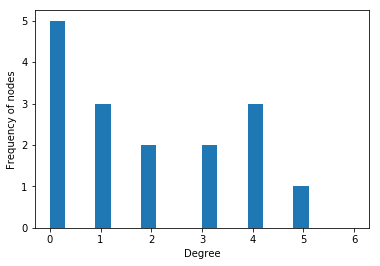

In [182]:
# plot the histogram

import matplotlib.pyplot as plt
plt.hist(nx.degree(x).values(), bins=20, range=(0, 6))   # plot histogram with above function
plt.xlabel('Degree')
plt.ylabel('Frequency of nodes')
plt.show()

Figure above shows the degree distribution

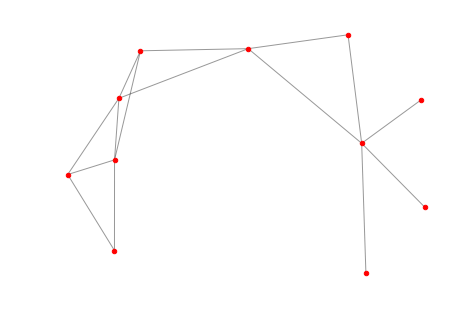

In [16]:
# Network diagram

import networkx as nx
import matplotlib.pyplot as plt
plt.axes([1,1,1,1])
Gcc = sorted(nx.connected_component_subgraphs(x), key = len, reverse = True)[0] # define parameters
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size = 20)   # draw the nodes
nx.draw_networkx_edges(Gcc, pos, alpha = 0.4)      # draw the edges
plt.show()

Added a network diagram